In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Visualizations

age,customerid and gender column is not important for analysis so we can drop these columns

In [6]:
data.drop(columns=['Gender','Age','CustomerID'],axis=1, inplace = True)

In [7]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [12]:
# rename coloumn name 
data = data.rename(columns= {'Annual Income (k$)':'annual_income','Spending Score (1-100)': 'spending_score'})

In [13]:
data.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='annual_income', ylabel='spending_score'>

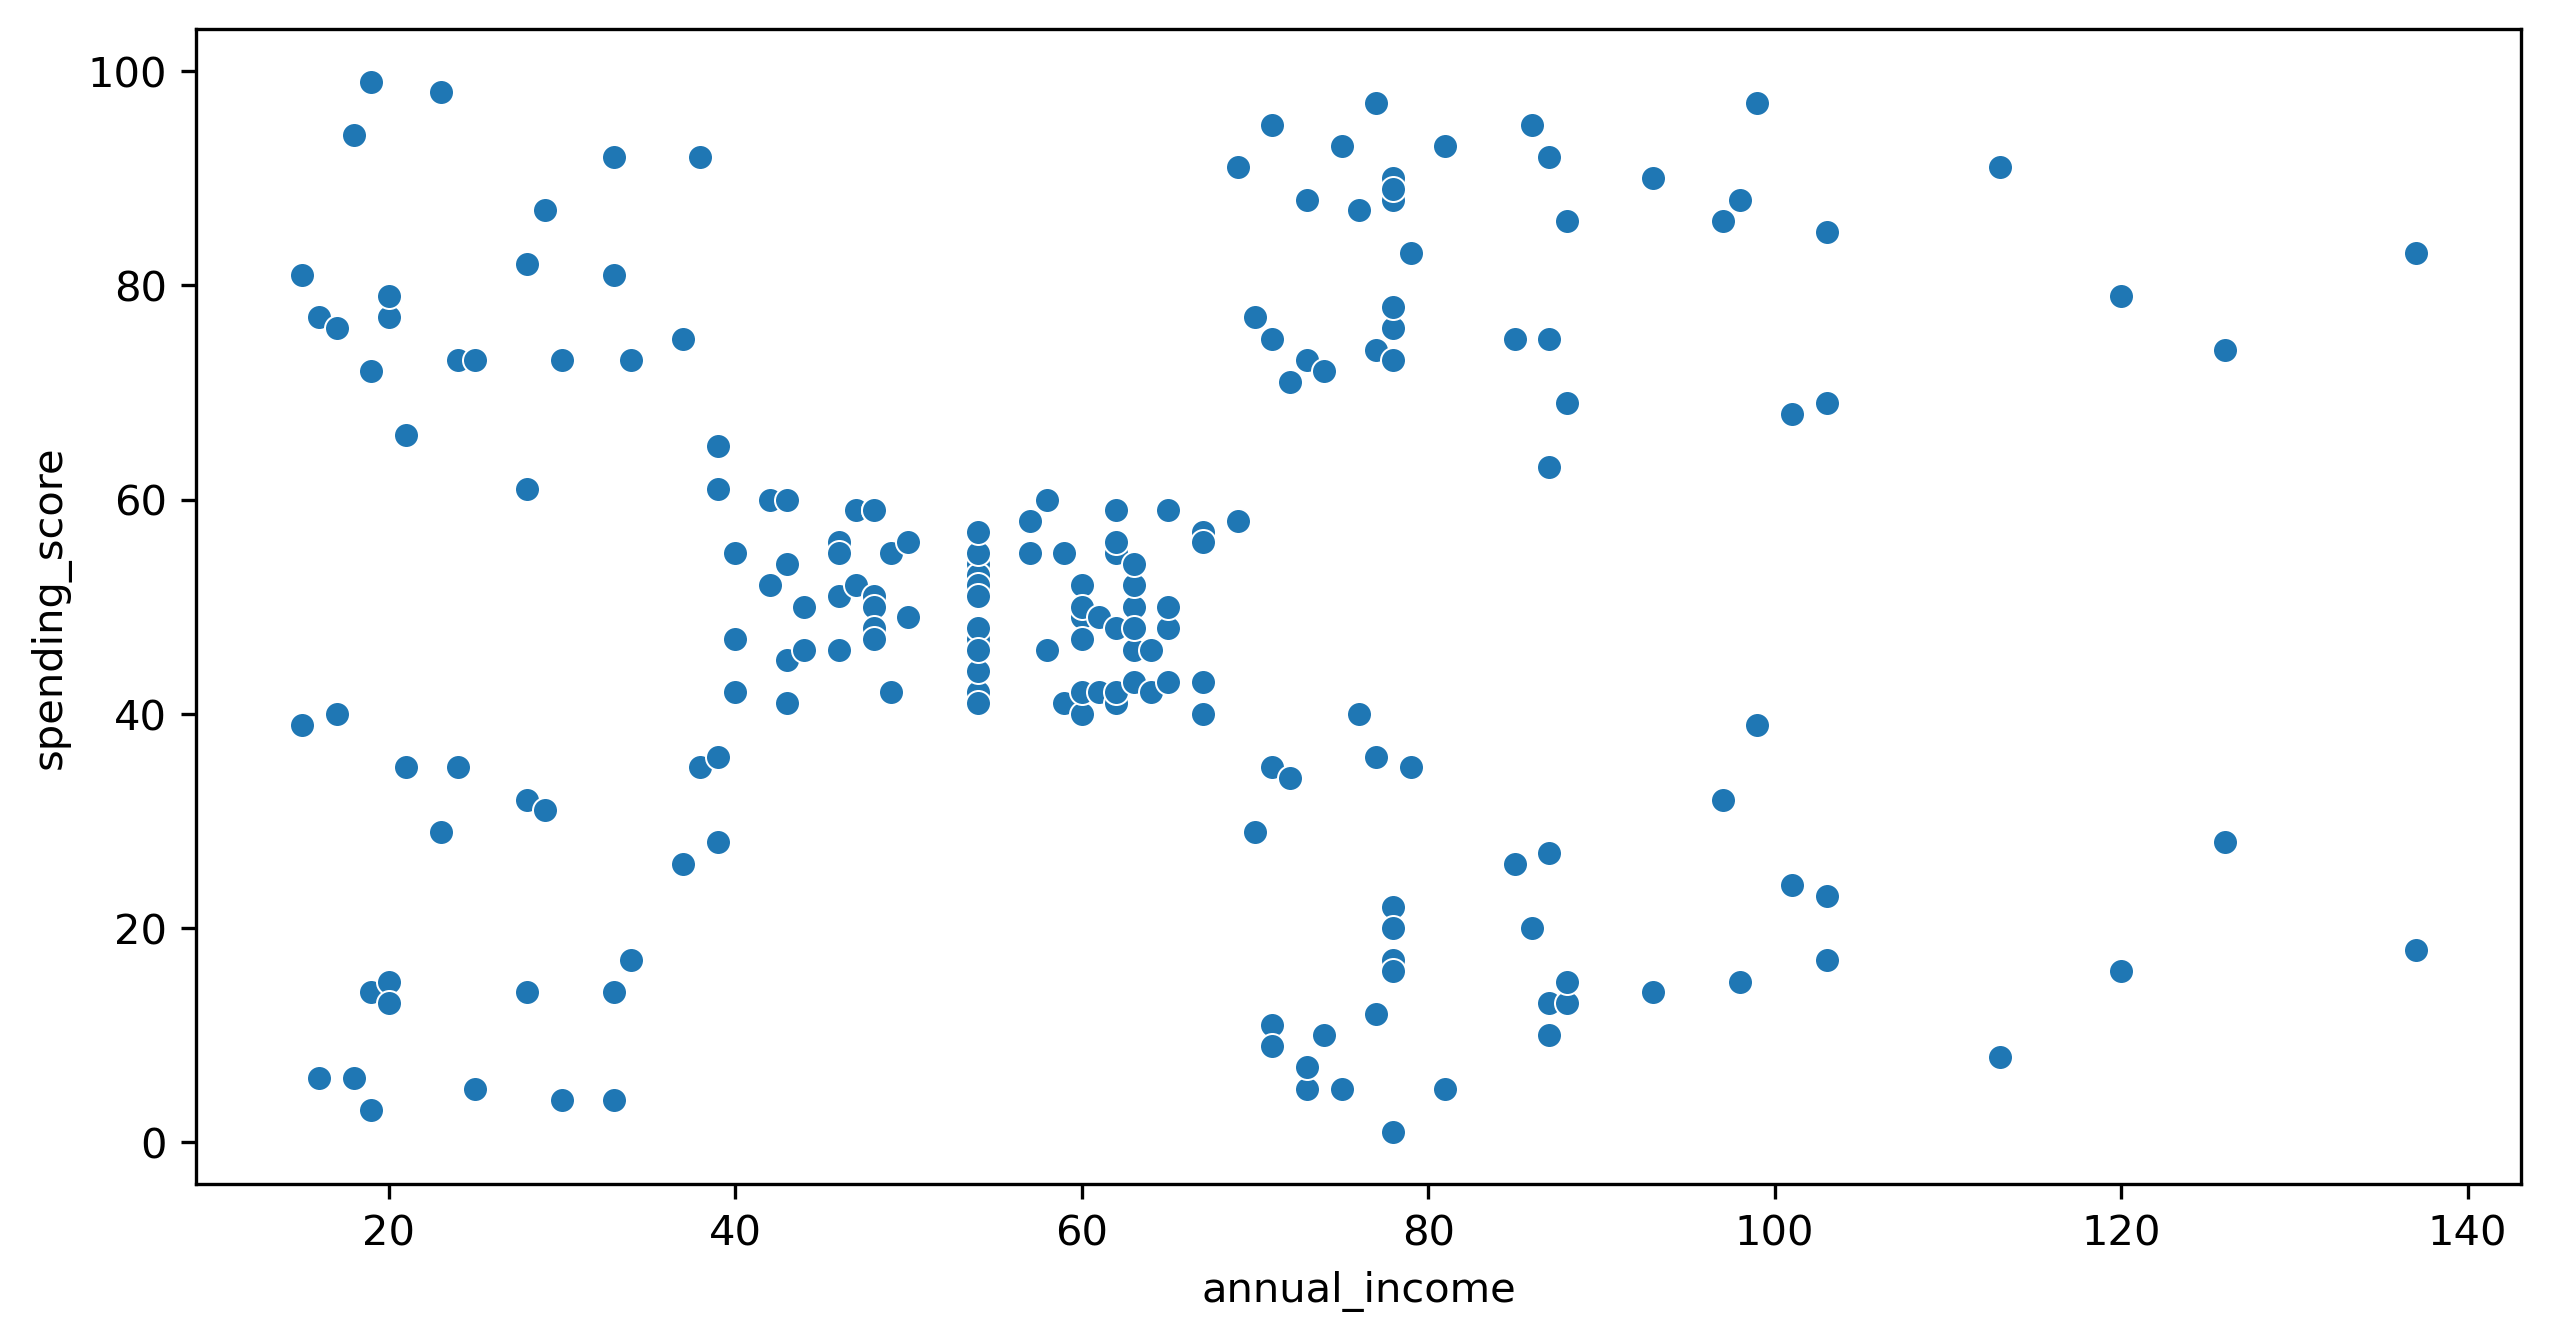

In [15]:
sns.scatterplot(x=data['annual_income'],y=data['spending_score'])

# StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc = StandardScaler()
x_scaled  = sc.fit_transform(data)
x_scaled 

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [18]:
from sklearn.cluster import KMeans

In [19]:
km = KMeans()


In [20]:
labels =km.fit_predict(x_scaled)
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 1, 7, 1, 2, 1, 2, 1,
       7, 1, 2, 1, 2, 1, 2, 1, 2, 1, 7, 1, 2, 1, 7, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 7, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       5, 6], dtype=int32)

In [21]:
#cluster center
km.cluster_centers_

array([[-0.48996553,  0.02444932],
       [ 0.66703804,  1.23036618],
       [ 0.7489536 , -1.45651437],
       [-1.35366972,  1.15873115],
       [-1.35185213, -1.19089759],
       [ 1.87564575, -1.09476801],
       [ 1.81769762,  1.26275949],
       [ 0.14847908, -0.14558085]])

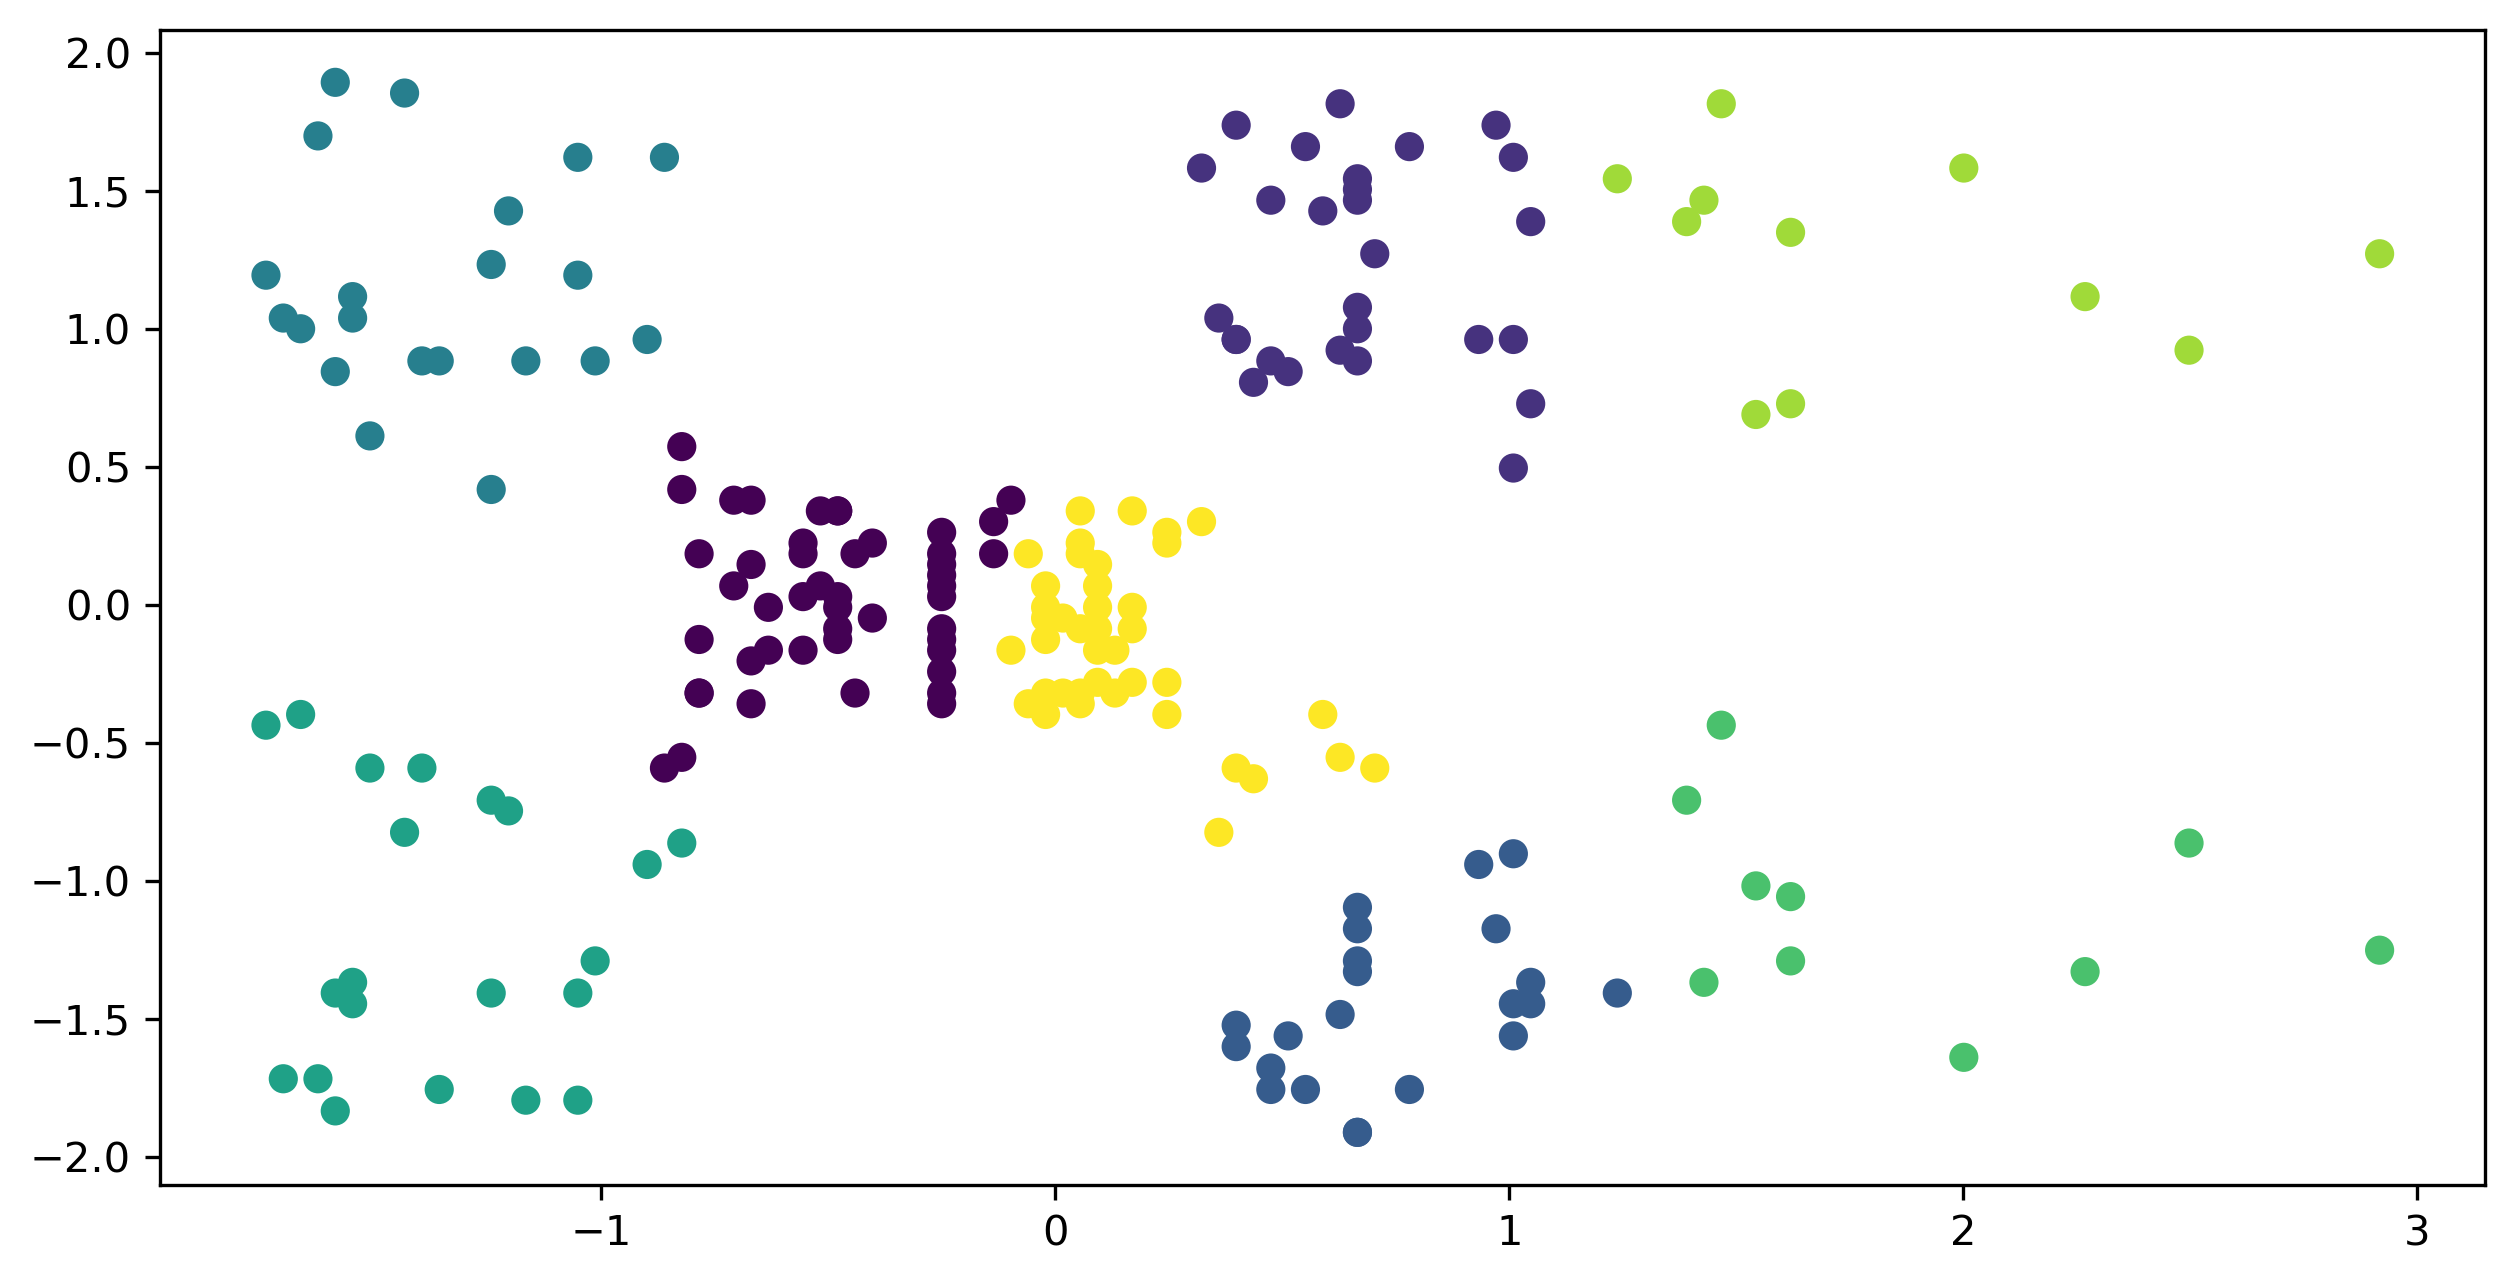

In [22]:
#visualize the cluster
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=labels, cmap= 'viridis')

# Elbow Graph

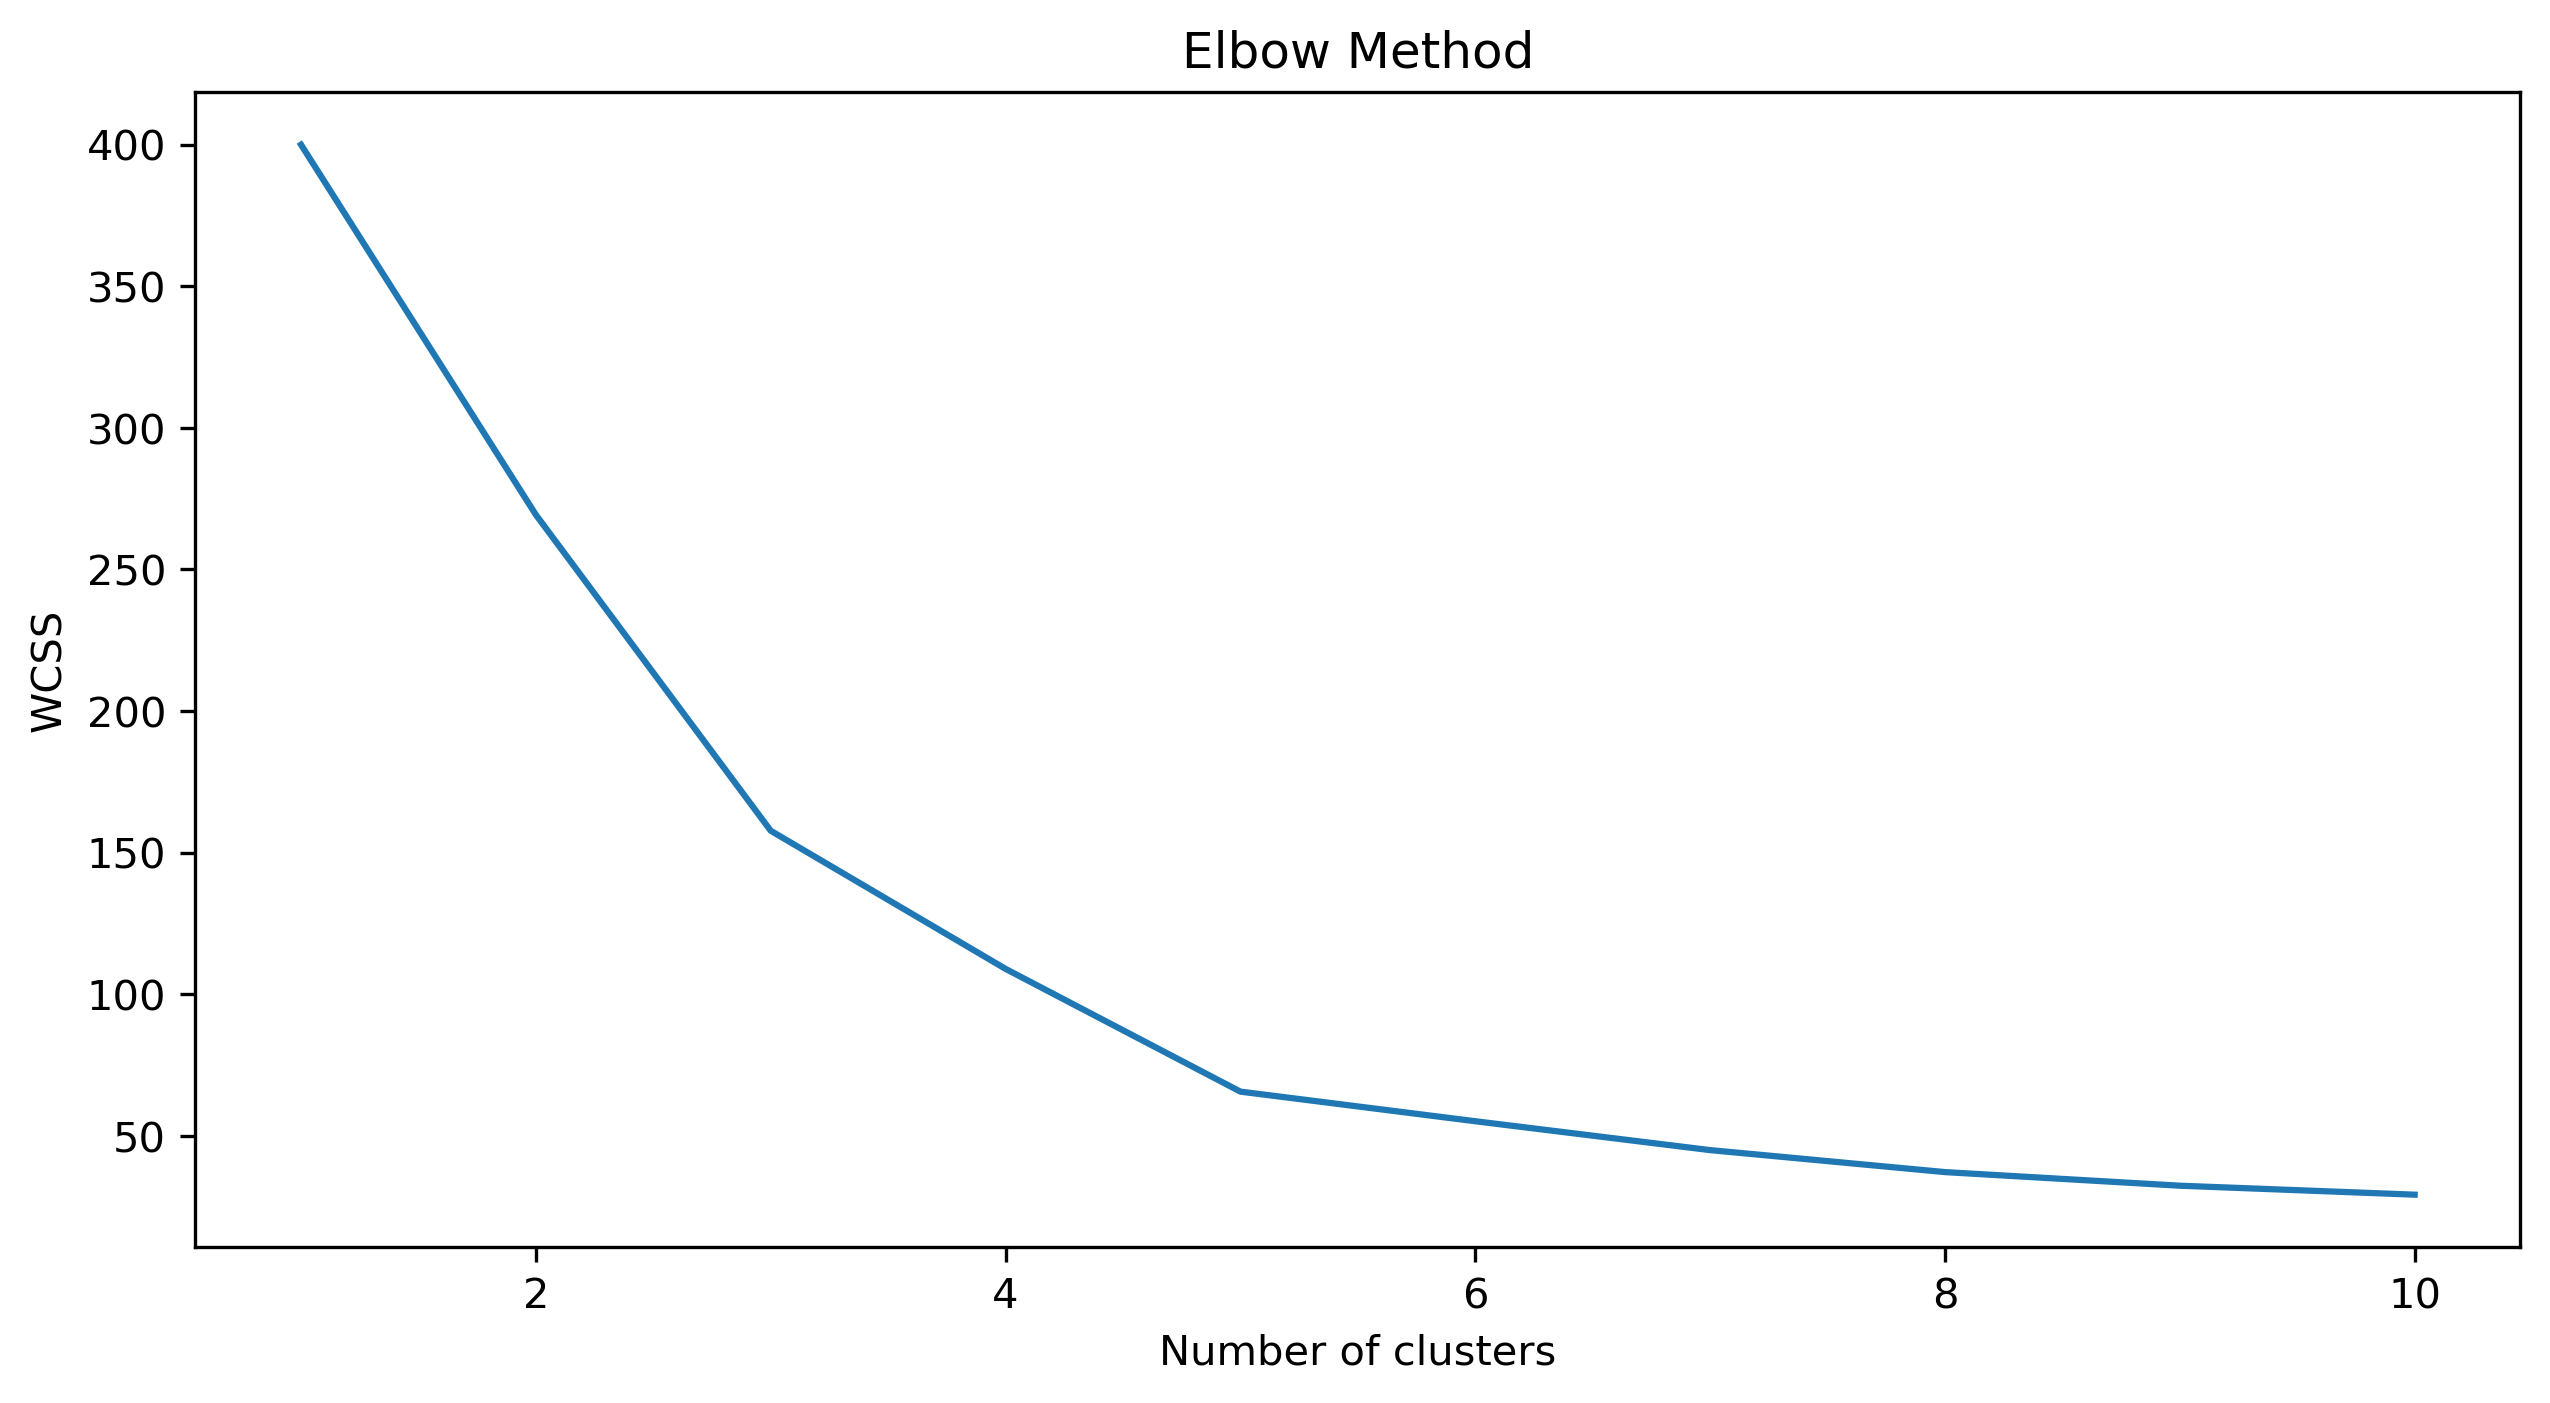

In [23]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

the elbow method show 5 no.of cluster 

# Final model

In [24]:
km = KMeans(n_clusters=5)
y = km.fit_predict(x_scaled)
km.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536]])

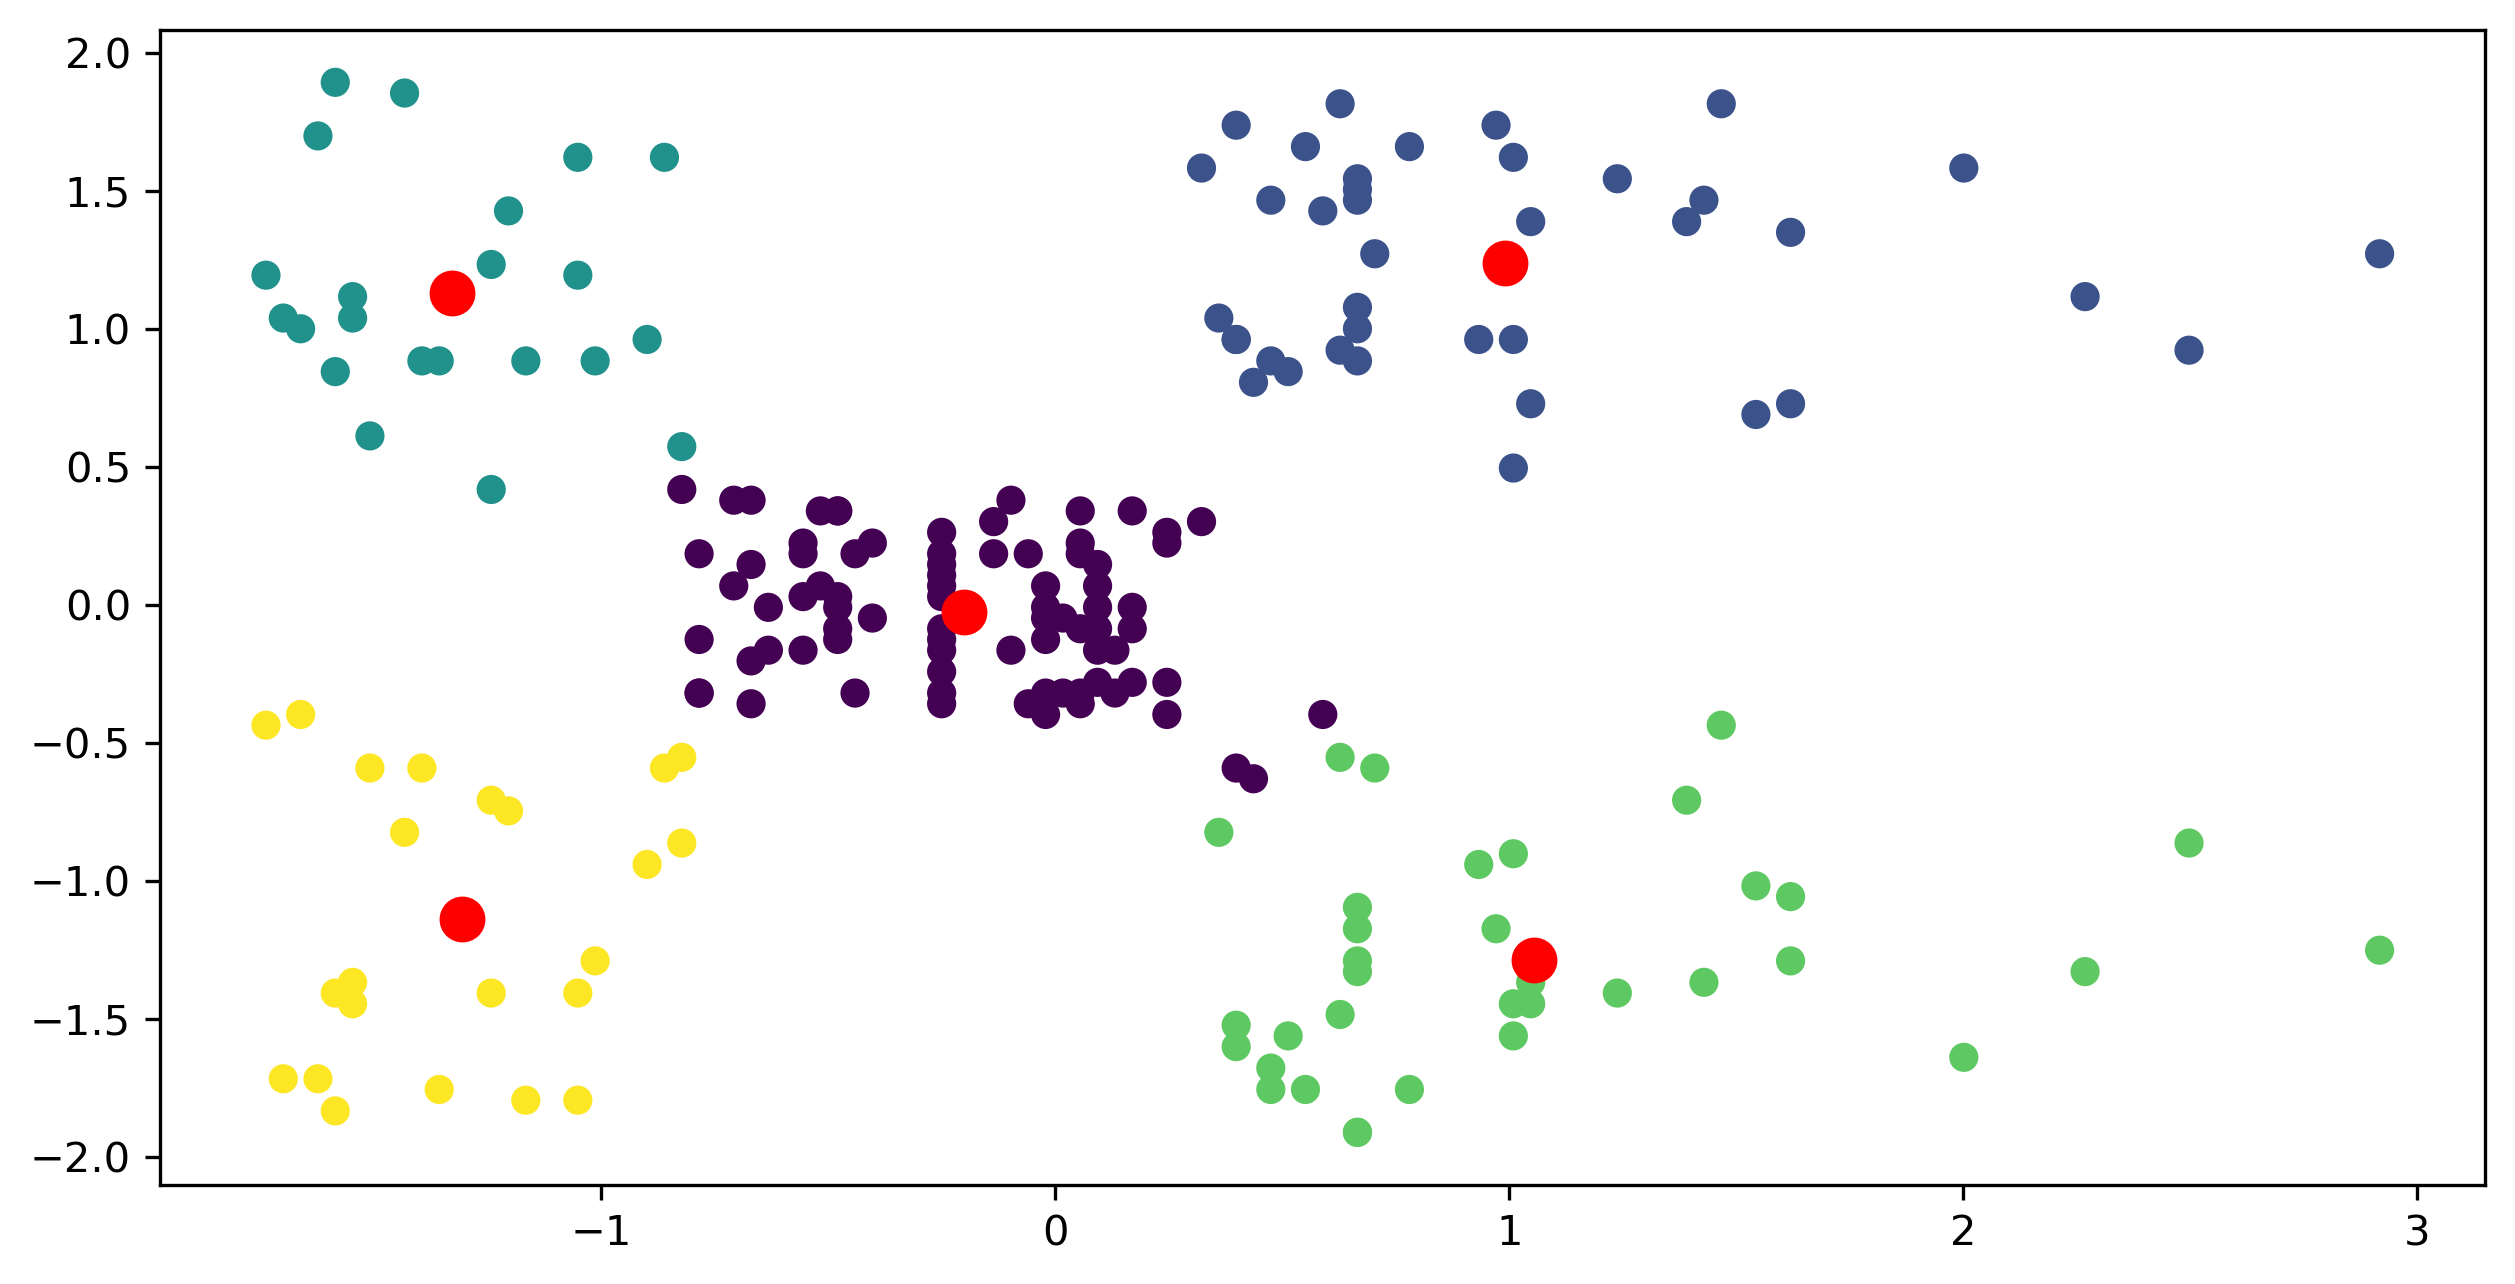

In [25]:
#visualize the cluster
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=y, cmap= 'viridis')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c ='red',s=100)